## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [4]:
# Carregando o arquivo
data = pd.read_csv('housing.csv')
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
# Verificar as colunas
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# Verificar os tipos de variáveis
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# Verificando se há NaN
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [8]:
# Removendo as linhas sem valor
data = data.dropna()
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Removendo as colunas irrelevantes e definindo X
X = data.drop(columns = ['longitude', 'latitude', 'median_house_value', 'ocean_proximity']).copy()

X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20433 non-null  float64
 1   total_rooms         20433 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20433 non-null  float64
 4   households          20433 non-null  float64
 5   median_income       20433 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB
None


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [10]:
# Definindo y
y = data.loc[:, 'median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [11]:
# Calculando a matriz de correlação
corr = X.corr()
corr

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
housing_median_age,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278
total_rooms,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723
population,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087
households,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434
median_income,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000


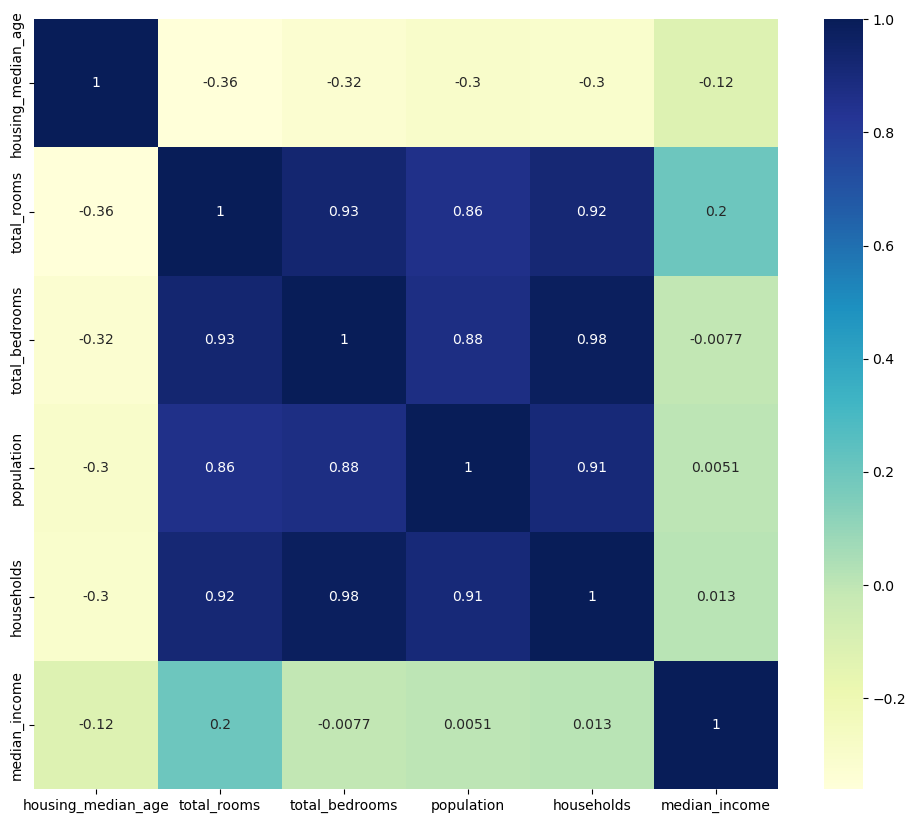

In [12]:
# Criando um heatmap com seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [14]:
# Separação dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Treinando a primeira árvore com profundidade máxima = 8
tree1 = DecisionTreeRegressor(max_depth=8)
tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [16]:
previsoes = tree1.predict(X_test)
print('MSE da base de teste:',tree1.score(X_test,y_test))

MSE da base de teste: 0.556903148171985


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [18]:
path = tree1.cost_complexity_pruning_path(X_train, y_train)

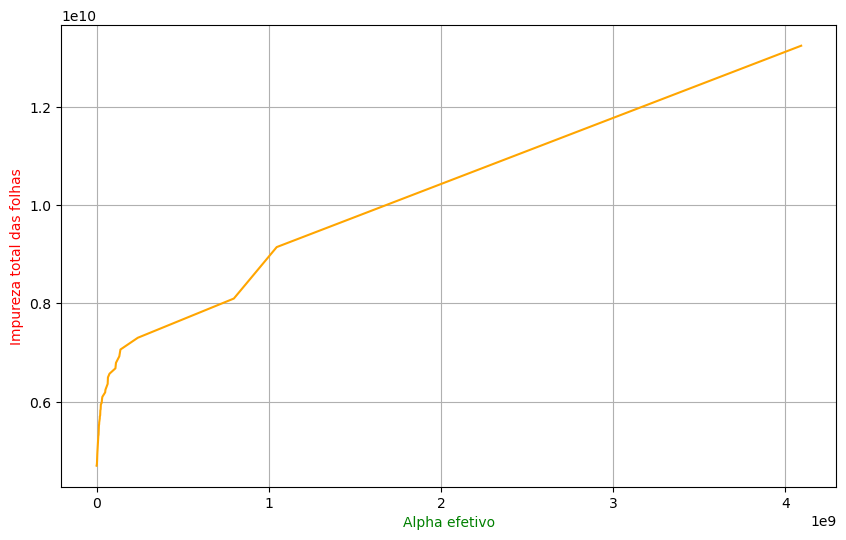

In [19]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, color = 'orange')
plt.xlabel("Alpha efetivo", color = 'green')
plt.ylabel("Impureza total das folhas", color = 'red')
plt.grid(True)
plt.show()

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [21]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [22]:
clfs

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=439.851085599832, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1101.553927566377, random_state=0),
 DecisionTreeRegressor(ccp_alpha=8027.6520249602345, random_state=0),
 DecisionTreeRegressor(ccp_alpha=33919.30747583506, random_state=0),
 DecisionTreeRegressor(ccp_alpha=57356.539867044994, random_state=0),
 DecisionTreeRegressor(ccp_alpha=68146.3354949223, random_state=0),
 DecisionTreeRegressor(ccp_alpha=123373.71018393835, random_state=0),
 DecisionTreeRegressor(ccp_alpha=156694.48183041735, random_state=0),
 DecisionTreeRegressor(ccp_alpha=158636.9754068275, random_state=0),
 DecisionTreeRegressor(ccp_alpha=181664.29095803254, random_state=0),
 DecisionTreeRegressor(ccp_alpha=195121.95190429315, random_state=0),
 DecisionTreeRegressor(ccp_alpha=255504.81259431774, random_state=0),
 DecisionTreeRegressor(ccp_alpha=284054.2121645226, random_state=0),
 DecisionTreeRegressor(ccp_alpha=313346.06435991626, rando

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [24]:
train_scores = [mean_squared_error(y_true=y_train, 
                                   y_pred=clf.predict(X_train)) for clf in clfs]

test_scores  = [mean_squared_error(y_true=y_test, 
                                   y_pred=clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

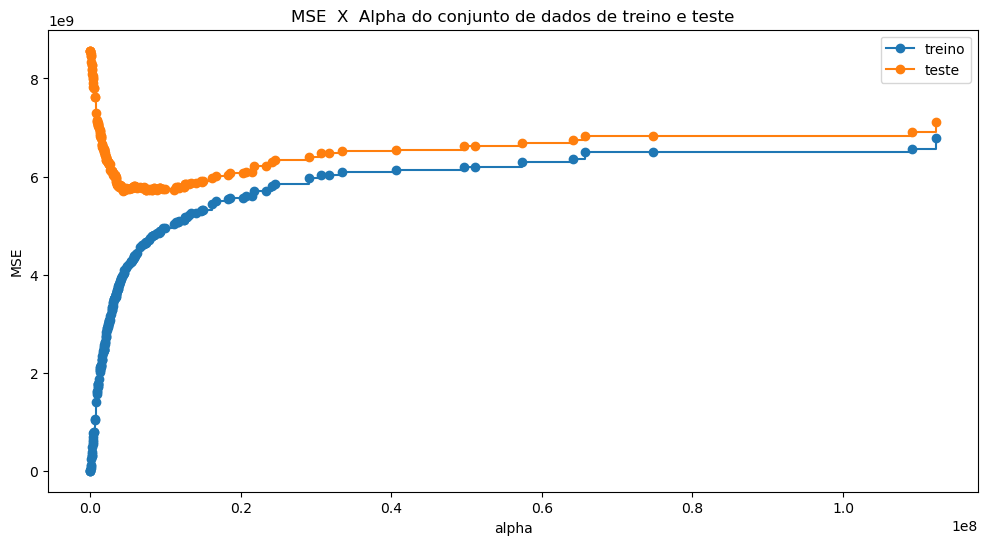

In [26]:

fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlabel(xlabel='alpha')
ax.set_ylabel(ylabel='MSE')
ax.set_title(label='MSE  X  Alpha do conjunto de dados de treino e teste')

ax.plot(ccp_alphas[:-6], train_scores[:-6], 
        marker='o', label='treino', drawstyle='steps-post')

ax.plot(ccp_alphas[:-6], test_scores[:-6], 
        marker='o', label='teste', drawstyle='steps-post')

ax.legend()

plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [28]:
df_ccp = pd.DataFrame(data={'ccp_alphas':ccp_alphas, 
                            'train_scores':train_scores, 
                            'test_scores':test_scores})

df_ccp.sort_values(by=['test_scores', 'train_scores'])

,ccp_alphas,train_scores,test_scores
112,4.273201e+06,4.001368e+09,5.703365e+09
138,7.435276e+06,4.664552e+09,5.716529e+09
152,1.111328e+07,5.028410e+09,5.721551e+09
139,7.763894e+06,4.702158e+09,5.724138e+09
141,8.116750e+06,4.781329e+09,5.725111e+09
...,...,...,...
3,8.027652e+03,1.098328e+07,8.560610e+09
2,1.101554e+03,9.461035e+05,8.564436e+09
1,4.398511e+02,2.666627e+05,8.564952e+09
0,0.000000e+00,0.000000e+00,8.566425e+09


In [29]:
ccp_alpha_min = df_ccp.sort_values(by=['test_scores', 'train_scores']).iloc[0,0]
ccp_alpha_min

4273200.932887532

In [30]:

final_tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha_min, random_state=0)
final_tree.fit(X_train, y_train)

print(f'Profundidade: {final_tree.tree_.max_depth}')
print(f'R-quadrado na base de testes: {final_tree.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, final_tree.predict(X_test)):.2f}')

Profundidade: 15
R-quadrado na base de testes: 0.58
MSE na base de testes: 5703364916.42


### 7. Visualize esta árvore.

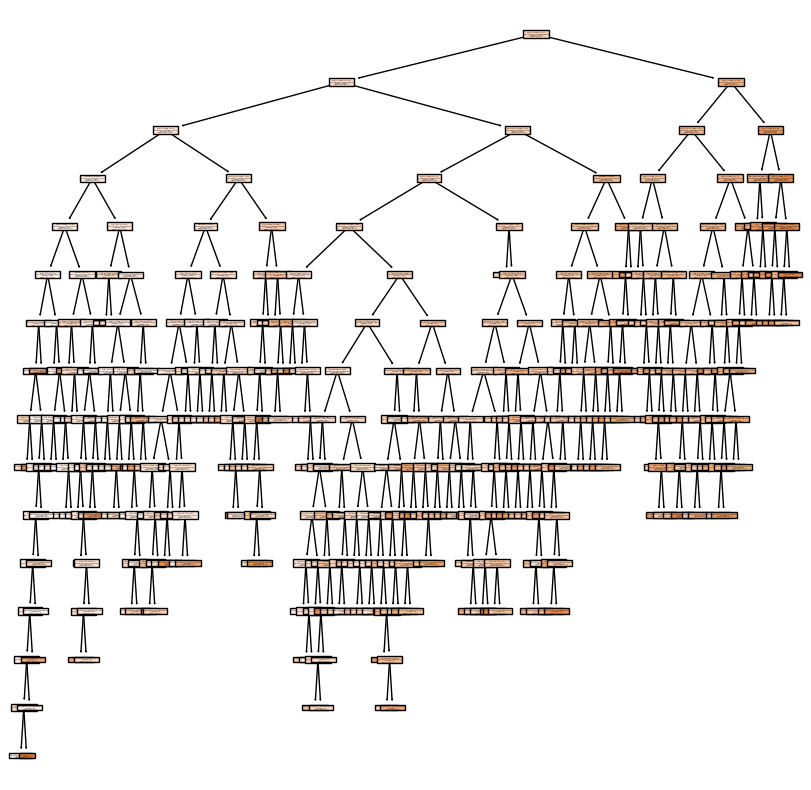

In [32]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(final_tree, 
                    feature_names=X.columns,  
                    filled=True) 